# 📊 Analyse Exploratoire des Données Financières

Ce notebook effectue une analyse exploratoire complète des données de marché pour l'optimisation de portefeuille.

**Objectifs:**
- Charger et nettoyer les données
- Calculer les statistiques descriptives
- Analyser les corrélations entre actifs
- Étudier la distribution des rendements
- Identifier les secteurs et leurs caractéristiques

In [3]:
# Imports
import sys
sys.path.insert(0, '../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from data_loader import prepare_data, load_tickers_by_sector
from financial_metrics import portfolio_return, portfolio_volatility, sharpe_ratio

# Configuration graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Paramètres d'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

print("✅ Imports réussis")

✅ Imports réussis


## 1. Chargement des Données

In [ ]:
# Chargement des données
prices, returns, mu, Sigma, ticker_sectors = prepare_data(
    start_date="2020-01-01",
    end_date="2024-12-31",
    data_dir="../data/raw",
    tick_json_path="../data/tick.json"
)

tickers = list(prices.columns)
n_assets = len(tickers)

print(f" Nombre d'actifs: {n_assets}")
print(f" Période: {prices.index[0].date()} → {prices.index[-1].date()}")
print(f" Nombre d'observations: {len(prices)}")
print(f"\n Secteurs disponibles: {len(set(ticker_sectors.values()))}")

📊 Nombre d'actifs: 196
📅 Période: 2020-01-01 → 2024-12-31
📈 Nombre d'observations: 1305

🏢 Secteurs disponibles: 11


c:\Users\redlam\Downloads\PROJET_PORTFOLIO_OPTIMIZATION\notebooks\../src\data_loader.py:88: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_clean = data_clean.fillna(method='ffill').fillna(method='bfill')


In [ ]:
# Aperçu des prix
print(" Aperçu des prix (5 premières lignes):")
prices.head()

📋 Aperçu des prix (5 premières lignes):


,GOOGL,META,DIS,NFLX,VZ,T,TMUS,CMCSA,CHTR,EA,TTWO,AMZN,TSLA,HD,LOW,MCD,SBUX,NKE,TGT,BKNG,MAR,HLT,MGM,ROST,TJX,GM,F,ULTA,ORLY,AZO,PVH,TPR,CCL,RCL,EBAY,LULU,PG,KO,PEP,WMT,COST,MO,PM,MDLZ,KMB,CL,KHC,GIS,HSY,SYY,KR,TAP,STZ,EL,CPB,CHD,XOM,CVX,COP,EOG,SLB,HAL,DVN,OXY,MPC,VLO,PSX,KMI,WMB,EQT,JPM,BAC,C,WFC,GS,MS,BLK,BK,STT,TROW,SCHW,AXP,COF,USB,PNC,TFC,CMA,MTB,RF,CB,TRV,AIG,MET,PRU,JNJ,PFE,MRK,ABBV,LLY,BMY,GILD,AMGN,MDT,SYK,ISRG,DHR,TMO,UNH,HUM,CI,HCA,CVS,ZBH,REGN,CAT,DE,HON,GE,LMT,NOC,RTX,BA,MMM,ITW,EMR,ETN,PH,GD,UPS,FDX,CMI,DAL,LUV,UNP,NSC,CSX,ROP,ROK,OTIS,AAPL,MSFT,NVDA,AVGO,AMD,INTC,QCOM,TXN,MU,ORCL,CRM,NOW,PANW,ANET,ADBE,SHOP,SAP,ASML,TSM,LRCX,KLAC,AMAT,ADI,NXPI,INTU,CDNS,CRWD,ZS,MDB,LIN,APD,ECL,SHW,PPG,MLM,VMC,NUE,STLD,FCX,ALB,DD,PLD,AMT,CCI,SPG,O,PSA,WELL,EQIX,NEE,DUK,SO,D,AEP,EXC,SRE,XEL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,67.9208,208.4947,145.7699,32.981,43.3495,19.2064,75.9263,38.5921,490.43,104.3660,122.08,94.9005,28.6840,189.9894,107.9574,174.7648,78.2217,94.2733,107.5544,2041.1807,145.5136,109.9014,33.3797,110.1498,57.0814,35.6308,7.0279,254.55,29.1680,1189.74,104.4159,23.4565,50.7181,131.4712,32.7936,233.42,106.2732,45.7451,113.1140,36.5081,266.4976,31.0790,63.3324,47.2670,109.8350,59.1479,23.7550,42.3859,125.0874,72.5139,25.2239,46.0693,170.5381,190.6550,39.6870,65.2290,53.6617,92.9179,52.5638,64.1403,34.8744,22.1145,18.8581,38.8626,51.3482,74.4703,87.5864,14.6658,17.0462,9.6762,119.5733,30.7605,65.3110,46.0524,203.1826,43.0697,440.1968,42.6770,66.9825,98.6830,44.3698,116.6386,93.4619,46.1500,128.5346,42.9398,53.7665,140.6204,13.3553,141.7594,121.0503,44.5179,42.2021,70.0312,123.2902,27.9554,73.2481,69.8235,122.9981,50.9348,52.0767,199.6075,97.0698,197.9112,199.0867,134.1526,321.5800,265.2430,345.7776,187.4504,140.6693,61.1264,138.3167,371.2908,132.8749,163.4508,150.3670,57.8977,339.3885,322.1471,83.5384,331.3486,120.6825,158.7749,67.7645,86.2760,192.6885,155.0063,91.9486,139.5158,154.4281,57.0423,51.0487,159.5595,173.9999,22.5100,352.8624,185.1208,41.5555,72.4683,152.5057,5.9711,27.7886,49.10,53.6665,77.6464,109.1960,54.0657,49.4516,165.2517,291.24,39.2350,12.7950,334.43,40.781,124.0980,286.9032,53.7797,27.7489,169.9220,58.7727,108.1292,116.2579,255.9942,71.44,49.44,47.33,134.33,193.3854,201.2783,178.9259,180.7236,117.0557,265.4230,135.5840,49.2219,30.1511,12.3085,67.5013,23.5981,75.4617,195.5223,110.2664,103.7739,52.3810,165.9459,66.9151,518.2677,51.4343,71.1525,49.6700,63.1078,75.3582,26.1496,61.3115,52.2644
2020-01-02,67.9208,208.4947,145.7699,32.981,43.3495,19.2064,75.9263,38.5921,490.43,104.3660,122.08,94.9005,28.6840,189.9894,107.9574,174.7648,78.2217,94.2733,107.5544,2041.1807,145.5136,109.9014,33.3797,110.1498,57.0814,35.6308,7.0279,254.55,29.1680,1189.74,104.4159,23.4565,50.7181,131.4712,32.7936,233.42,106.2732,45.7451,113.1140,36.5081,266.4976,31.0790,63.3324,47.2670,109.8350,59.1479,23.7550,42.3859,125.0874,72.5139,25.2239,46.0693,170.5381,190.6550,39.6870,65.2290,53.6617,92.9179,52.5638,64.1403,34.8744,22.1145,18.8581,38.8626,51.3482,74.4703,87.5864,14.6658,17.0462,9.6762,119.5733,30.7605,65.3110,46.0524,203.1826,43.0697,440.1968,42.6770,66.9825,98.6830,44.3698,116.6386,93.4619,46.1500,128.5346,42.9398,53.7665,140.6204,13.3553,141.7594,121.0503,44.5179,42.2021,70.0312,123.2902,27.9554,73.2481,69.8235,122.9981,50.9348,52.0767,199.6075,97.0698,197.9112,199.0867,134.1526,321.5800,265.2430,345.7776,187.4504,140.6693,61.1264,138.3167,371.2908,132.8749,163.4508,150.3670,57.8977,339.3885,322.1471,83.5384,331.3486,120.6825,158.7749,67.7645,86.2760,192.6885,155.0063,91.9486,139.5158,154.4281,57.0423,51.0487,159.5595,173.9999,22.5100,352.8624,185.1208,41.5555,72.4683,152.5057,5.9711,27.7886,49.10,53.6665,77.6464,109.1960,54.0657,49.4516,165.2517,291.24,39.2350,12.7950,334.43,40.781,124.0980,286.9032,53.7797,27.7489,169.9220,58.7727,108.1292,116

In [ ]:
# Aperçu des rendements
print(" Aperçu des rendements (5 premières lignes):")
returns.head()

📋 Aperçu des rendements (5 premières lignes):


,GOOGL,META,DIS,NFLX,VZ,T,TMUS,CMCSA,CHTR,EA,TTWO,AMZN,TSLA,HD,LOW,MCD,SBUX,NKE,TGT,BKNG,MAR,HLT,MGM,ROST,TJX,GM,F,ULTA,ORLY,AZO,PVH,TPR,CCL,RCL,EBAY,LULU,PG,KO,PEP,WMT,COST,MO,PM,MDLZ,KMB,CL,KHC,GIS,HSY,SYY,KR,TAP,STZ,EL,CPB,CHD,XOM,CVX,COP,EOG,SLB,HAL,DVN,OXY,MPC,VLO,PSX,KMI,WMB,EQT,JPM,BAC,C,WFC,GS,MS,BLK,BK,STT,TROW,SCHW,AXP,COF,USB,PNC,TFC,CMA,MTB,RF,CB,TRV,AIG,MET,PRU,JNJ,PFE,MRK,ABBV,LLY,BMY,GILD,AMGN,MDT,SYK,ISRG,DHR,TMO,UNH,HUM,CI,HCA,CVS,ZBH,REGN,CAT,DE,HON,GE,LMT,NOC,RTX,BA,MMM,ITW,EMR,ETN,PH,GD,UPS,FDX,CMI,DAL,LUV,UNP,NSC,CSX,ROP,ROK,OTIS,AAPL,MSFT,NVDA,AVGO,AMD,INTC,QCOM,TXN,MU,ORCL,CRM,NOW,PANW,ANET,ADBE,SHOP,SAP,ASML,TSM,LRCX,KLAC,AMAT,ADI,NXPI,INTU,CDNS,CRWD,ZS,MDB,LIN,APD,ECL,SHW,PPG,MLM,VMC,NUE,STLD,FCX,ALB,DD,PLD,AMT,CCI,SPG,O,PSA,WELL,EQIX,NEE,DUK,SO,D,AEP,EXC,SRE,XEL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-01-03,-0.0052,-0.0053,-0.0115,-0.0119,-0.0107,0.0051,-0.0054,-0.0080,0.0082,-0.0013,0.0011,-0.0122,0.0292,-0.0033,-0.0072,-0.0035,-0.0058,-0.0027,-0.0104,-0.0044,-0.0148,-0.0132,-0.0111,0.0003,-0.0075,-0.0288,-0.0225,-0.0174,0.0028,-0.0015,-1.9747e-02,-0.0004,-0.0281,-0.0087,-0.0094,-0.0033,-0.0067,-0.0055,-0.0014,-0.0089,0.0008,0.0077,-0.0019,-0.0017,-0.0003,-0.0015,-0.0118,-0.0037,0.0090,-0.0037,0.0014,-0.0030,0.0065,-0.0076,-0.0012,0.0034,-0.0081,-0.0035,0.0037,0.0101,0.0097,0.0032,0.0119,0.0239,-0.0613,-0.0387,-0.0336,0.0076,0.0042,-0.0019,-0.0133,-0.0210,-0.0190,-0.0062,-0.0118,-0.0163,-0.0107,-0.0128,-0.0148,-0.0033,-0.0256,-0.0100,-0.0157,-0.0117,-0.0096,-0.0083,-0.0153,-0.0103,-0.0189,-0.0015,-0.0036,-0.0078,-0.0103,-0.0168,-0.0116,-0.0054,-0.0086,-0.0095,-0.0033,-0.0089,-0.0025,-0.0068,-0.0060,-0.0041,-0.0066,-0.0062,-0.0109,-0.0102,0.0044,-0.0086,0.0030,-0.0080,-0.0026,-0.0113,-0.0140,-0.0074,-0.0107,0.0033,0.0353,0.0529,0.0014,-0.0017,-0.0086,-0.0142,-0.0138,-0.0074,-0.0142,0.0098,-0.0006,-0.0125,-0.0141,-0.0167,-0.0090,-0.0071,-0.0018,-0.0041,-0.0059,-0.0147,0.0,-0.0098,-0.0125,-0.0161,-0.0258,-0.0102,-0.0122,-0.0190,-0.0134,-0.0156,-0.0035,-0.0049,-0.0005,0.0060,-0.0191,-0.0079,-0.0087,-0.0209,-0.0162,-0.0335,-0.0108,-0.0193,-0.0160,-0.0178,-0.0097,-0.0067,-0.0144,0.0262,0.0011,0.0071,-0.0263,-0.0225,-0.0048,-0.0130,-0.0146,-0.0030,-0.0044,-0.0133,-0.0179,-0.0308,-0.0144,-0.0213,0.0111,0.0005,0.0055,0.0018,0.0179,0.0107,0.0174,0.0099,0.0071,0.0007,-0.0010,-0.0024,-0.0011,0.0031,-0.0092,0.0048
2020-01-06,0.0263,0.0187,-0.0058,0.0300,-0.0022,0.0010,0.0057,-0.0076,0.0060,0.0

## 2. Statistiques Descriptives

In [ ]:
# Statistiques globales
stats = pd.DataFrame({
    'Rendement Annuel (%)': mu * 100,
    'Volatilité (%)': np.sqrt(np.diag(Sigma)) * 100,
    'Sharpe Ratio': (mu - 0.02) / np.sqrt(np.diag(Sigma)),
    'Skewness': returns.skew(),
    'Kurtosis': returns.kurtosis(),
    'Min Return (%)': returns.min() * 100,
    'Max Return (%)': returns.max() * 100,
    'Secteur': [ticker_sectors.get(t, 'Unknown') for t in tickers]
}, index=tickers)

print(" Statistiques descriptives:")
stats.describe()

📊 Statistiques descriptives:


,Rendement Annuel (%),Volatilité (%),Sharpe Ratio,Skewness,Kurtosis,Min Return (%),Max Return (%)
count,196.0000,196.0000,196.0000,196.0000,196.0000,196.0000,196.0000
mean,10.4216,35.3842,0.2388,-0.4739,12.8374,-18.5151,15.2521
std,10.5617,10.2696,0.2701,0.6917,9.4624,8.4478,4.8307
min,-19.0268,19.2581,-0.5182,-4.0047,2.3212,-73.4257,6.1671
25%,4.7485,27.9808,0.0922,-0.7954,6.9871,-21.6539,11.5836
50%,9.4370,33.1719,0.2205,-0.3376,10.5548,-16.4611,14.5382
75%,16.0068,40.7722,0.3818,-0.0435,15.6248,-12.9998,17.8016
max,60.1554,73.8975,1.1067,1.0711,84.3141,-7.5784,33.1394


In [ ]:
# Top 10 et Bottom 10 par rendement
print(" TOP 10 - Meilleurs rendements:")
print(stats.nlargest(10, 'Rendement Annuel (%)')[['Rendement Annuel (%)', 'Volatilité (%)', 'Sharpe Ratio', 'Secteur']])

print("\n BOTTOM 10 - Pires rendements:")
print(stats.nsmallest(10, 'Rendement Annuel (%)')[['Rendement Annuel (%)', 'Volatilité (%)', 'Sharpe Ratio', 'Secteur']])

🏆 TOP 10 - Meilleurs rendements:
      Rendement Annuel (%)  Volatilité (%)  Sharpe Ratio  \
NVDA               60.1554         52.5479        1.1067   
TSLA               51.1088         65.7826        0.7465   
ANET               41.6695         41.5775        0.9541   
AVGO               40.8599         40.9475        0.9490   
CRWD               37.3849         53.8265        0.6574   
LLY                35.3531         31.5533        1.0570   
EQT                29.9428         55.0047        0.5080   
PANW               29.6490         41.8187        0.6612   
CDNS               27.7597         36.2976        0.7097   
ZS                 25.8587         57.2124        0.4170   

                     Secteur  
NVDA  Information Technology  
TSLA  Consumer Discretionary  
ANET  Information Technology  
AVGO  Information Technology  
CRWD  Information Technology  
LLY              Health Care  
EQT                   Energy  
PANW  Information Technology  
CDNS  Information Technolog

In [ ]:
# Top 10 par Sharpe Ratio
print(" TOP 10 - Meilleurs Sharpe Ratios:")
print(stats.nlargest(10, 'Sharpe Ratio')[['Rendement Annuel (%)', 'Volatilité (%)', 'Sharpe Ratio', 'Secteur']])

⭐ TOP 10 - Meilleurs Sharpe Ratios:
      Rendement Annuel (%)  Volatilité (%)  Sharpe Ratio  \
NVDA               60.1554         52.5479        1.1067   
LLY                35.3531         31.5533        1.0570   
ANET               41.6695         41.5775        0.9541   
AVGO               40.8599         40.9475        0.9490   
COST               23.7649         23.7334        0.9171   
TSLA               51.1088         65.7826        0.7465   
ETN                25.8407         32.1614        0.7413   
CDNS               27.7597         36.2976        0.7097   
AAPL               23.8758         31.0793        0.7039   
WMT                17.3669         22.1694        0.6932   

                     Secteur  
NVDA  Information Technology  
LLY              Health Care  
ANET  Information Technology  
AVGO  Information Technology  
COST        Consumer Staples  
TSLA  Consumer Discretionary  
ETN              Industrials  
CDNS  Information Technology  
AAPL  Information Techno

## 3. Visualisations des Rendements

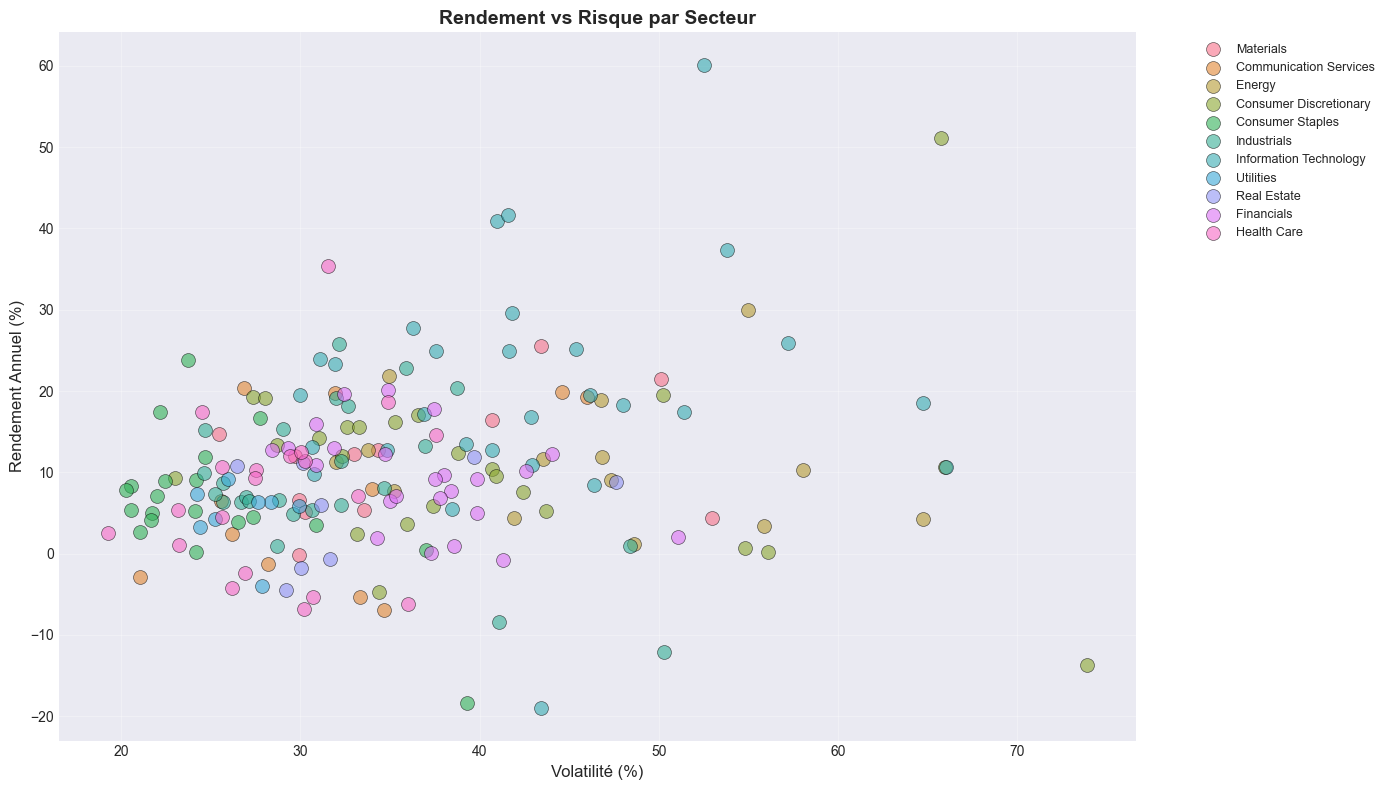

In [10]:
# Scatter plot Rendement vs Risque
fig, ax = plt.subplots(figsize=(14, 8))

sectors_unique = list(set(ticker_sectors.values()))
colors = sns.color_palette('husl', len(sectors_unique))
sector_colors = {sector: colors[i] for i, sector in enumerate(sectors_unique)}

for sector in sectors_unique:
    mask = stats['Secteur'] == sector
    ax.scatter(stats[mask]['Volatilité (%)'], 
              stats[mask]['Rendement Annuel (%)'],
              label=sector, s=100, alpha=0.6, 
              c=[sector_colors[sector]], edgecolors='black', linewidth=0.5)

ax.set_xlabel('Volatilité (%)', fontsize=12)
ax.set_ylabel('Rendement Annuel (%)', fontsize=12)
ax.set_title('Rendement vs Risque par Secteur', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

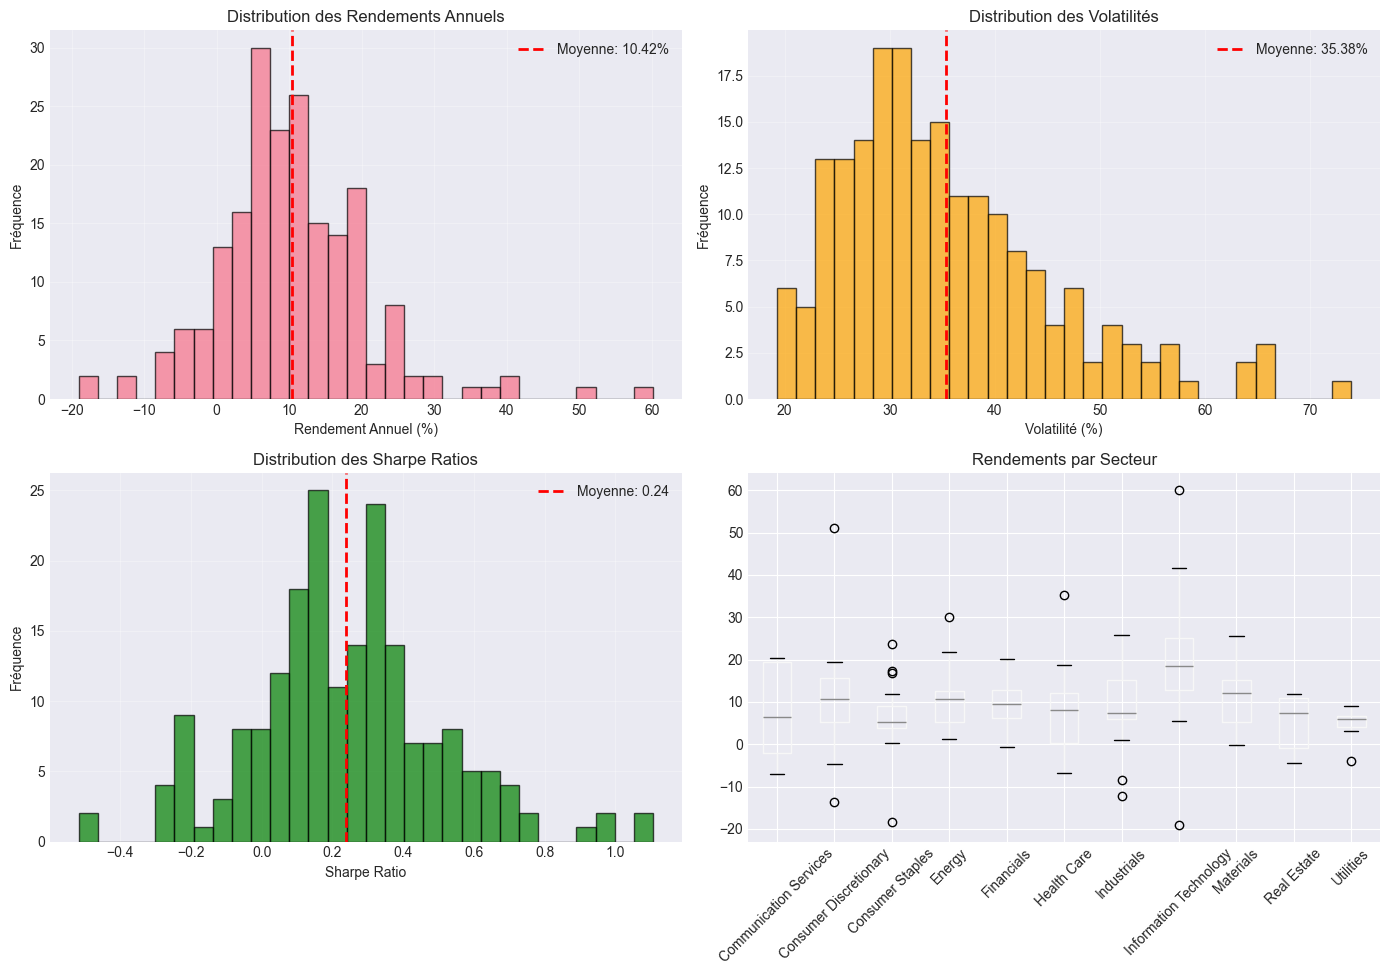

In [11]:
# Distribution des rendements annuels
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogramme
axes[0, 0].hist(stats['Rendement Annuel (%)'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(stats['Rendement Annuel (%)'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f"Moyenne: {stats['Rendement Annuel (%)'].mean():.2f}%")
axes[0, 0].set_xlabel('Rendement Annuel (%)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].set_title('Distribution des Rendements Annuels')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Histogramme volatilité
axes[0, 1].hist(stats['Volatilité (%)'], bins=30, color='orange', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(stats['Volatilité (%)'].mean(), color='red',
                   linestyle='--', linewidth=2, label=f"Moyenne: {stats['Volatilité (%)'].mean():.2f}%")
axes[0, 1].set_xlabel('Volatilité (%)')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].set_title('Distribution des Volatilités')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Histogramme Sharpe
axes[1, 0].hist(stats['Sharpe Ratio'].dropna(), bins=30, color='green', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(stats['Sharpe Ratio'].mean(), color='red',
                   linestyle='--', linewidth=2, label=f"Moyenne: {stats['Sharpe Ratio'].mean():.2f}")
axes[1, 0].set_xlabel('Sharpe Ratio')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].set_title('Distribution des Sharpe Ratios')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Boxplot par secteur
stats.boxplot(column='Rendement Annuel (%)', by='Secteur', ax=axes[1, 1], rot=45)
axes[1, 1].set_title('Rendements par Secteur')
axes[1, 1].set_xlabel('')
plt.suptitle('')

plt.tight_layout()
plt.show()

## 4. Analyse des Corrélations

In [ ]:
# Matrice de corrélation complète
corr_matrix = returns.corr()

print(f" Statistiques de corrélation:")
print(f"  - Corrélation moyenne: {corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].mean():.4f}")
print(f"  - Corrélation médiane: {np.median(corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]):.4f}")
print(f"  - Corrélation min: {corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].min():.4f}")
print(f"  - Corrélation max: {corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].max():.4f}")

📊 Statistiques de corrélation:
  - Corrélation moyenne: 0.3869
  - Corrélation médiane: 0.3839
  - Corrélation min: -0.0539
  - Corrélation max: 0.9308


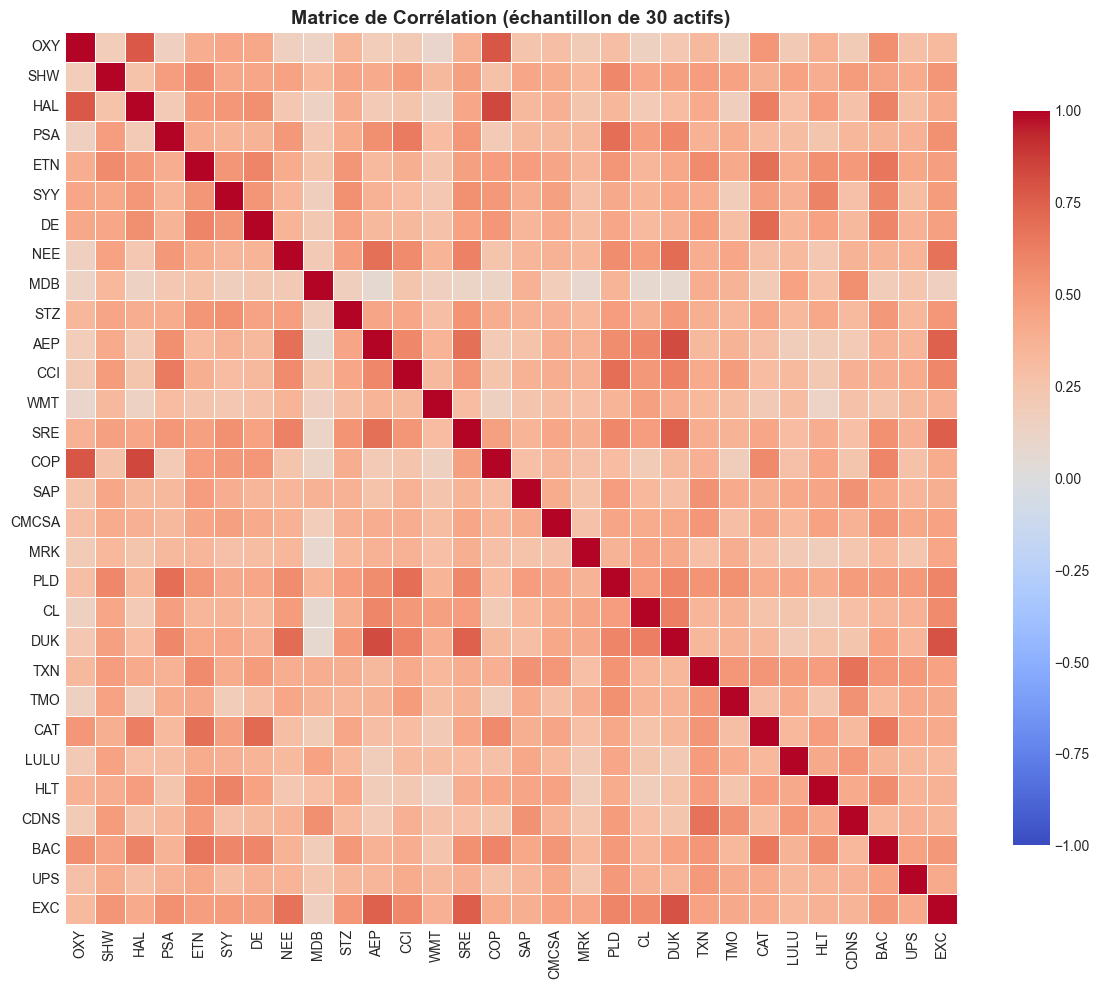

In [13]:
# Visualisation de la matrice de corrélation (échantillon)
# On prend un échantillon de 30 actifs pour la lisibilité
sample_tickers = np.random.choice(tickers, min(30, len(tickers)), replace=False)
corr_sample = returns[sample_tickers].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_sample, cmap='coolwarm', center=0, 
            vmin=-1, vmax=1, square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Matrice de Corrélation (échantillon de 30 actifs)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

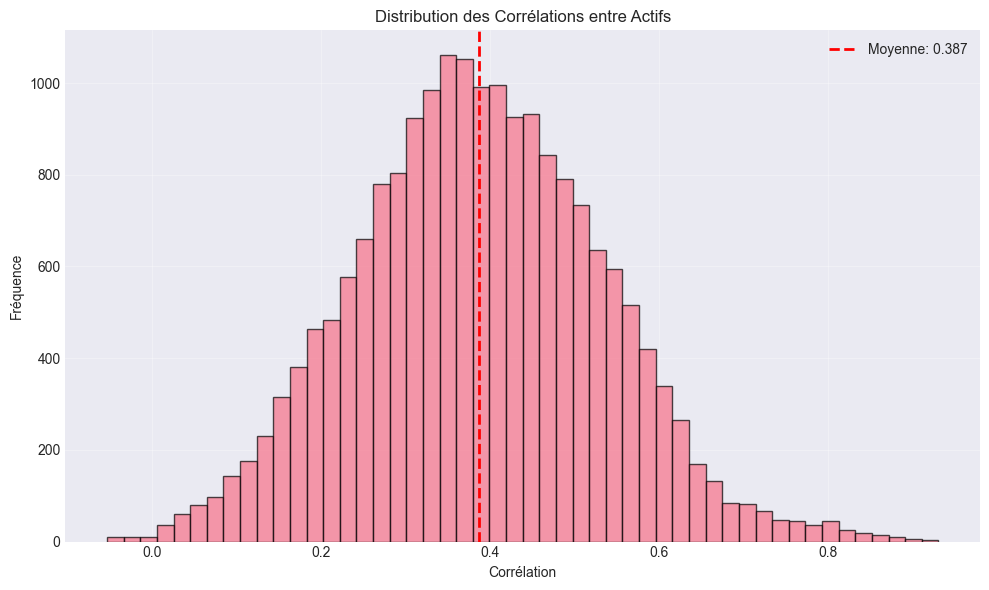

In [14]:
# Distribution des corrélations
fig, ax = plt.subplots(figsize=(10, 6))
corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
ax.hist(corr_values, bins=50, edgecolor='black', alpha=0.7)
ax.axvline(corr_values.mean(), color='red', linestyle='--', linewidth=2,
          label=f'Moyenne: {corr_values.mean():.3f}')
ax.set_xlabel('Corrélation')
ax.set_ylabel('Fréquence')
ax.set_title('Distribution des Corrélations entre Actifs')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Analyse par Secteur

In [15]:
# Statistiques par secteur
sector_stats = stats.groupby('Secteur').agg({
    'Rendement Annuel (%)': ['mean', 'std', 'min', 'max'],
    'Volatilité (%)': ['mean', 'std'],
    'Sharpe Ratio': ['mean', 'std']
}).round(3)

sector_stats.columns = ['_'.join(col).strip() for col in sector_stats.columns.values]
sector_stats['Nombre_Actifs'] = stats.groupby('Secteur').size()

print("📊 Statistiques par secteur:")
sector_stats.sort_values('Rendement Annuel (%)_mean', ascending=False)

📊 Statistiques par secteur:


,Rendement Annuel (%)_mean,Rendement Annuel (%)_std,Rendement Annuel (%)_min,Rendement Annuel (%)_max,Volatilité (%)_mean,Volatilité (%)_std,Sharpe Ratio_mean,Sharpe Ratio_std,Nombre_Actifs
Secteur,,,,,,,,,
Information Technology,20.386,13.976,-19.027,60.155,42.944,9.459,0.437,0.312,29
Materials,11.372,7.517,-0.113,25.492,36.103,8.740,0.256,0.188,12
Energy,11.311,7.841,1.229,29.943,46.039,9.977,0.216,0.177,14
Consumer Discretionary,10.906,11.591,-13.733,51.109,40.896,13.184,0.244,0.245,25
Financials,9.302,5.923,-0.735,20.168,36.744,5.100,0.212,0.178,24
Industrials,9.025,8.775,-12.117,25.841,32.032,6.857,0.238,0.247,25
Health Care,7.386,10.256,-6.775,35.353,28.665,4.642,0.181,0.335,20
Communication Services,7.244,10.894,-6.923,20.324,32.027,7.774,0.141,0.331,11
Consumer Staples,6.372,8.296,-18.373,23.765,25.100,5.262,0.205,0.299,20


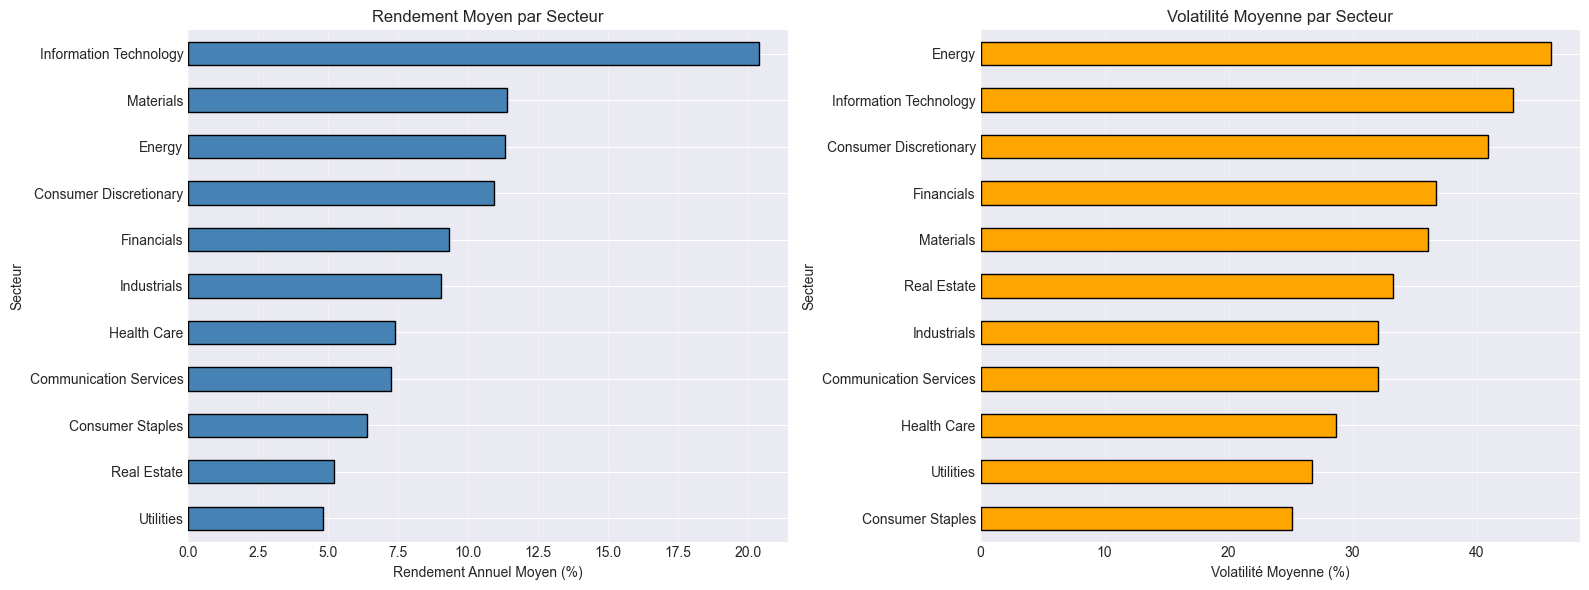

In [16]:
# Visualisation par secteur
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Rendement moyen par secteur
sector_means = stats.groupby('Secteur')['Rendement Annuel (%)'].mean().sort_values()
sector_means.plot(kind='barh', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_xlabel('Rendement Annuel Moyen (%)')
axes[0].set_title('Rendement Moyen par Secteur')
axes[0].grid(True, alpha=0.3, axis='x')

# Volatilité moyenne par secteur
sector_vols = stats.groupby('Secteur')['Volatilité (%)'].mean().sort_values()
sector_vols.plot(kind='barh', ax=axes[1], color='orange', edgecolor='black')
axes[1].set_xlabel('Volatilité Moyenne (%)')
axes[1].set_title('Volatilité Moyenne par Secteur')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## 6. Évolution Temporelle

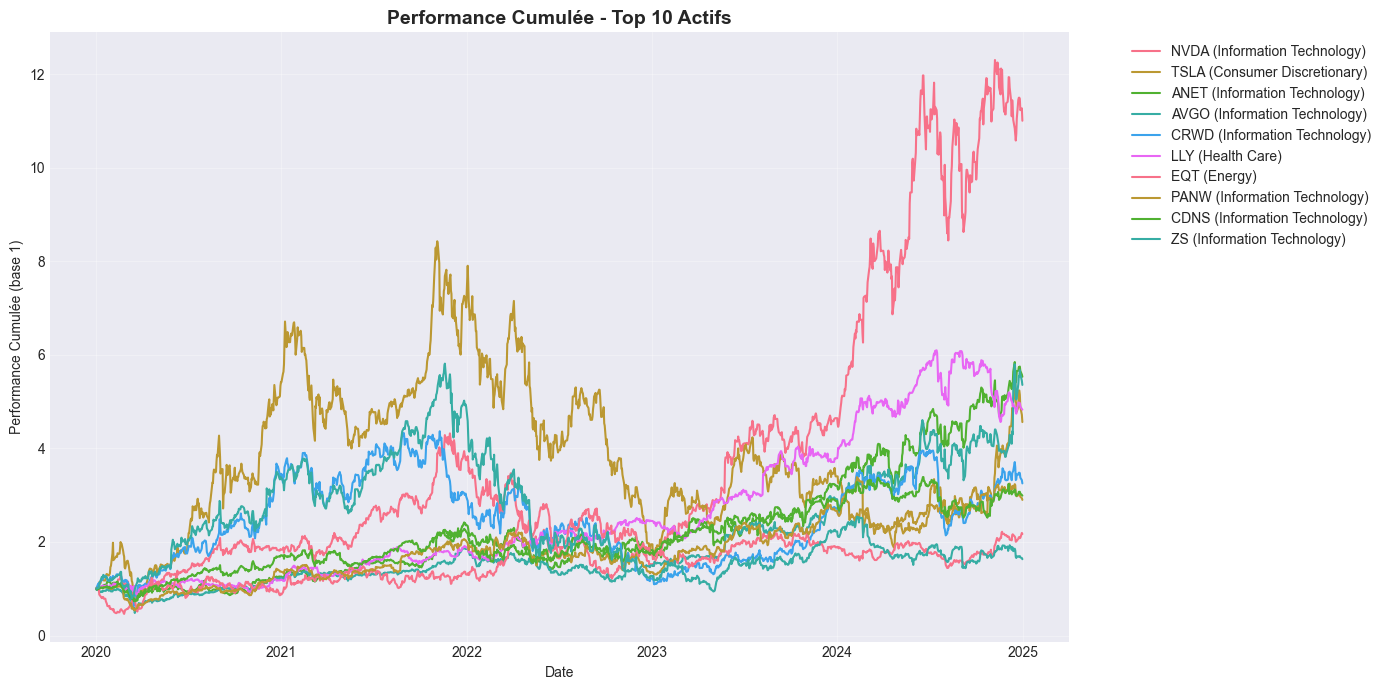

In [17]:
# Performance cumulée des 10 meilleurs actifs
top_10_tickers = stats.nlargest(10, 'Rendement Annuel (%)').index
cumulative_returns = (1 + returns[top_10_tickers]).cumprod()

fig, ax = plt.subplots(figsize=(14, 7))
for ticker in top_10_tickers:
    ax.plot(cumulative_returns.index, cumulative_returns[ticker], 
            label=f"{ticker} ({ticker_sectors.get(ticker, 'Unknown')})")

ax.set_xlabel('Date')
ax.set_ylabel('Performance Cumulée (base 1)')
ax.set_title('Performance Cumulée - Top 10 Actifs', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

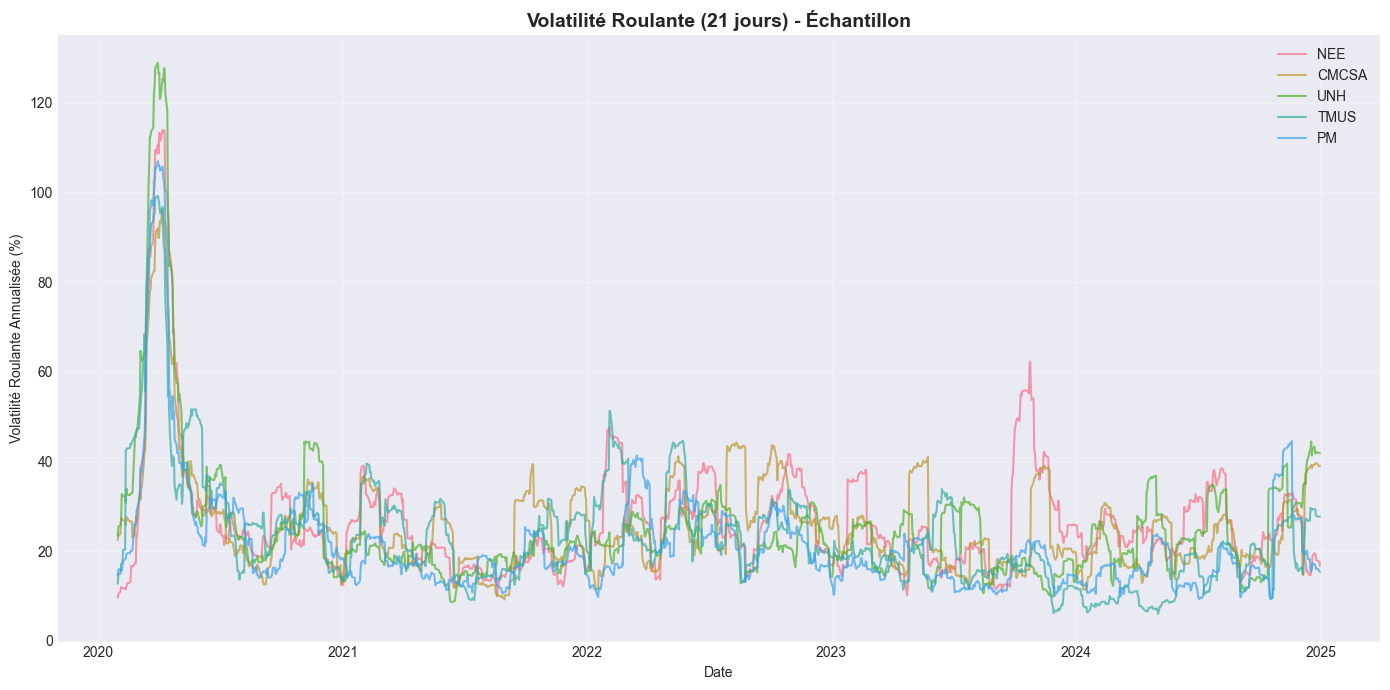

In [18]:
# Volatilité roulante (fenêtre de 21 jours)
rolling_vol = returns.rolling(window=21).std() * np.sqrt(252) * 100
sample_vol_tickers = np.random.choice(tickers, 5, replace=False)

fig, ax = plt.subplots(figsize=(14, 7))
for ticker in sample_vol_tickers:
    ax.plot(rolling_vol.index, rolling_vol[ticker], label=ticker, alpha=0.7)

ax.set_xlabel('Date')
ax.set_ylabel('Volatilité Roulante Annualisée (%)')
ax.set_title('Volatilité Roulante (21 jours) - Échantillon', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Tests de Normalité

In [ ]:
from scipy import stats as scipy_stats

# Test de normalité sur 10 actifs
sample_test_tickers = np.random.choice(tickers, 10, replace=False)
normality_results = []

for ticker in sample_test_tickers:
    stat, p_value = scipy_stats.shapiro(returns[ticker].dropna())
    normality_results.append({
        'Ticker': ticker,
        'Statistic': stat,
        'P-Value': p_value,
        'Normal': 'Oui' if p_value > 0.05 else 'Non'
    })

df_normality = pd.DataFrame(normality_results)
print(" Test de Normalité (Shapiro-Wilk) - Échantillon:")
print(df_normality)
print(f"\n {(df_normality['Normal'] == 'Non').sum()}/{len(df_normality)} actifs rejettent l'hypothèse de normalité (α=0.05)")

📊 Test de Normalité (Shapiro-Wilk) - Échantillon:
  Ticker  Statistic     P-Value Normal
0    STT     0.8959  8.0087e-29    Non
1   TROW     0.9175  4.5336e-26    Non
2    LLY     0.8868  7.4826e-30    Non
3   COST     0.9083  2.5946e-27    Non
4    DVN     0.8664  6.2008e-32    Non
5    COP     0.8750  4.2911e-31    Non
6   META     0.8415  3.6213e-34    Non
7    CRM     0.8900  1.7067e-29    Non
8   WELL     0.7833  1.8962e-38    Non
9    TMO     0.9582  7.1887e-19    Non

⚠️ 10/10 actifs rejettent l'hypothèse de normalité (α=0.05)


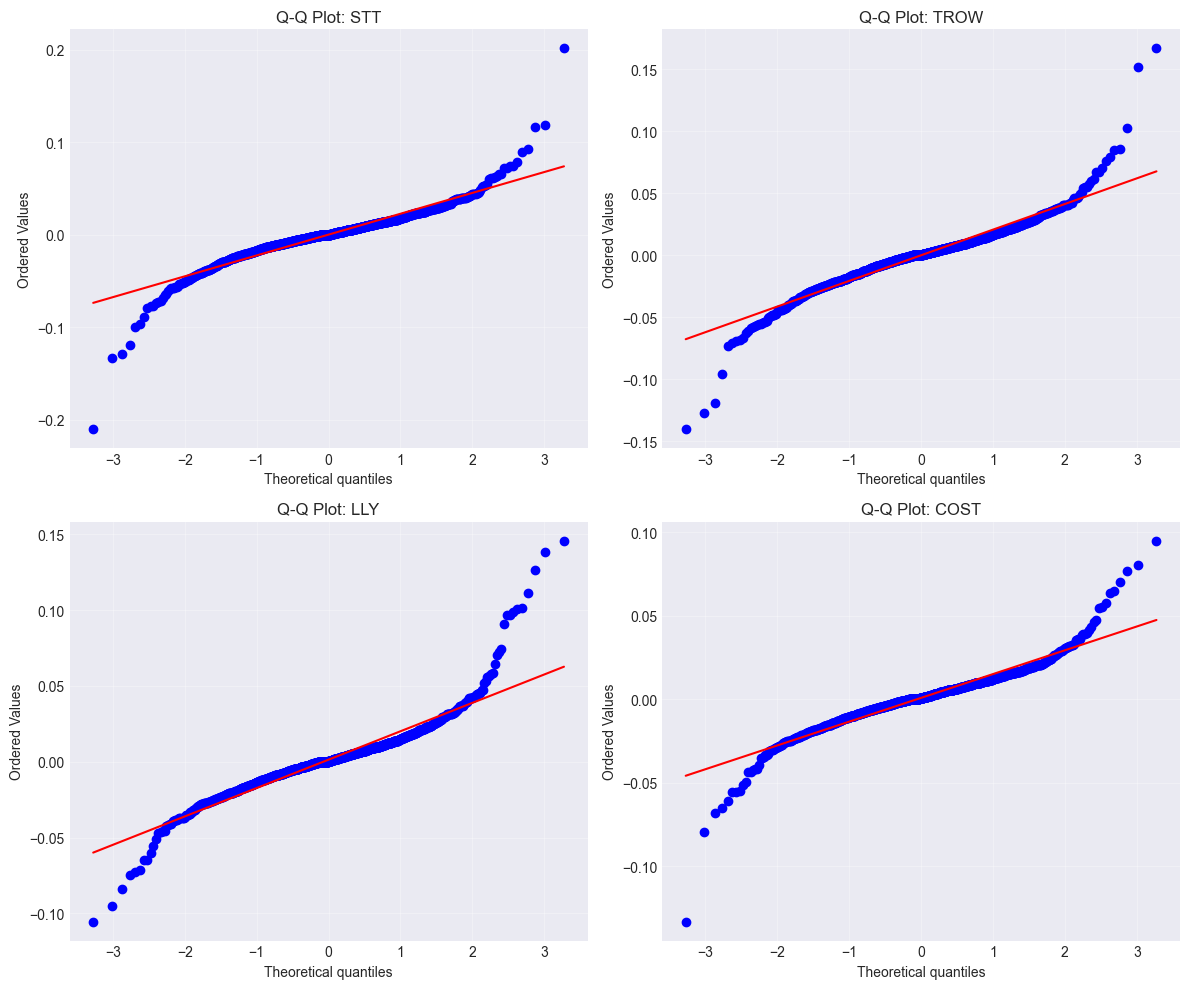

In [20]:
# Q-Q plots pour 4 actifs
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, ticker in enumerate(sample_test_tickers[:4]):
    scipy_stats.probplot(returns[ticker].dropna(), dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot: {ticker}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Sauvegarde des Résultats

In [ ]:
# Sauvegarde des statistiques
output_dir = Path('../data/processed')
output_dir.mkdir(parents=True, exist_ok=True)

stats.to_csv(output_dir / 'asset_statistics.csv')
sector_stats.to_csv(output_dir / 'sector_statistics.csv')
corr_matrix.to_csv(output_dir / 'correlation_matrix.csv')

# Sauvegarde mu et Sigma
np.savez(output_dir / 'mu_sigma.npz', mu=mu, Sigma=Sigma)

# Sauvegarde liste des tickers
with open(output_dir / 'tickers_list.txt', 'w') as f:
    f.write('\n'.join(tickers))

print(" Résultats sauvegardés dans:", output_dir)
print(f"  - asset_statistics.csv")
print(f"  - sector_statistics.csv")
print(f"  - correlation_matrix.csv")
print(f"  - mu_sigma.npz")
print(f"  - tickers_list.txt ({len(tickers)} tickers)")

✅ Résultats sauvegardés dans: ..\data\processed
  - asset_statistics.csv
  - sector_statistics.csv
  - correlation_matrix.csv
  - mu_sigma.npz
  - tickers_list.txt (196 tickers)
